In [1]:
%cd ../
%matplotlib inline

/home/ubuntu/HTFATorch


/home/ubuntu/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/matplotlib/__init__.py:962: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #2
  (fname, cnt))
/home/ubuntu/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/matplotlib/__init__.py:962: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #3
  (fname, cnt))


In [2]:
import logging
import numpy as np
import htfa_torch.dtfa as DTFA
import htfa_torch.niidb as niidb
import htfa_torch.utils as utils

/home/ubuntu/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/nilearn/plotting/__init__.py:20: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/home/ubuntu/anaconda3/envs/HTFATorch/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/ubuntu/anaconda3/envs/HTFATorch/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/ubuntu/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/ipykernel/__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "/home/ubuntu/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/ubuntu/a

In [3]:
logging.basicConfig(format='%(asctime)s %(message)s', datefmt='%m/%d/%Y %H:%M:%S',
                    level=logging.INFO)

In [4]:
synthetic_db = niidb.FMriActivationsDb('data/synthetic_data.db',
                                      mask='/data/eli/synthetic_data/nifti_files/wholebrain.nii.gz')

In [5]:
dtfa = DTFA.DeepTFA(synthetic_db.all(), mask='/data/eli/synthetic_data/nifti_files/wholebrain.nii.gz', num_factors=20, embedding_dim=2)

10/02/2018 14:34:37 Loading Nifti image /data/eli/synthetic_data/nifti_files/subject_18.nii with mask /data/eli/synthetic_data/nifti_files/wholebrain.nii.gz (zscore=False, smooth=None)
10/02/2018 14:34:40 Loading Nifti image /data/eli/synthetic_data/nifti_files/subject_1.nii with mask /data/eli/synthetic_data/nifti_files/wholebrain.nii.gz (zscore=False, smooth=None)
10/02/2018 14:34:44 Loading Nifti image /data/eli/synthetic_data/nifti_files/subject_14.nii with mask /data/eli/synthetic_data/nifti_files/wholebrain.nii.gz (zscore=False, smooth=None)
10/02/2018 14:34:47 Loading Nifti image /data/eli/synthetic_data/nifti_files/subject_6.nii with mask /data/eli/synthetic_data/nifti_files/wholebrain.nii.gz (zscore=False, smooth=None)
10/02/2018 14:34:51 Loading Nifti image /data/eli/synthetic_data/nifti_files/subject_19.nii with mask /data/eli/synthetic_data/nifti_files/wholebrain.nii.gz (zscore=False, smooth=None)
10/02/2018 14:34:55 Loading Nifti image /data/eli/synthetic_data/nifti_files/

In [6]:
dtfa.normalize_activations()

[tensor(10.8206),
 tensor(9.2271),
 tensor(12.5486),
 tensor(9.5577),
 tensor(16.9328),
 tensor(11.9599),
 tensor(11.7571),
 tensor(10.1775),
 tensor(14.3852),
 tensor(11.3451),
 tensor(15.9531),
 tensor(7.2812),
 tensor(16.7118),
 tensor(11.4212),
 tensor(12.9853),
 tensor(12.6523),
 tensor(14.9423),
 tensor(14.4482),
 tensor(11.2110),
 tensor(8.6124)]

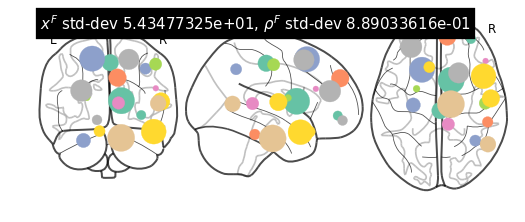

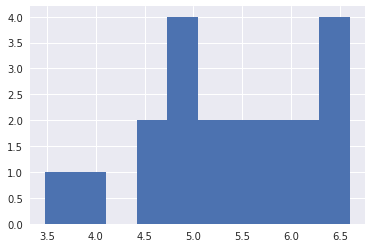

(<nilearn.plotting.displays.OrthoProjector at 0x7faef7476e10>,
 tensor([[ 34.6407,  52.2207,  -5.7883],
         [  2.0386, -23.0619,  49.3307],
         [ 13.7620,   8.8547,   9.3061],
         [ 52.1113, -35.0688, -25.5658],
         [  9.6562,  54.7832,  33.5344],
         [-26.1487, -17.2326, -32.4974],
         [-17.0275,  19.8359,  53.5563],
         [ 39.1233, -54.7338,  43.0281],
         [ 10.7063, -37.4586,   6.9381],
         [ 49.9429,  29.1417,  22.3843],
         [ 49.7311, -15.2784,  47.8010],
         [-22.6704,  -0.1221,  12.8060],
         [ 55.5025, -10.2739,   8.5313],
         [ -9.2671,  22.6656, -22.7008],
         [ 47.7456,  13.0472, -23.2157],
         [ 13.4551, -16.3459, -29.7772],
         [ 52.4314, -58.4838,   6.5989],
         [ 21.5610,  16.5753,  52.8316],
         [-11.8649,  57.2200, -10.9026],
         [-28.3976,  43.9711,  19.9500]]),
 tensor([ 4.4867,  5.6216,  6.5375,  4.7359,  5.7426,  5.3172,  6.4631,
          4.8450,  5.0582,  3.4863,  5.0289

In [7]:
dtfa.visualize_factor_embedding()

In [8]:
losses = dtfa.train(num_steps=2000, learning_rate=1e-1, log_level=logging.INFO, num_particles=1,
                    batch_size=300, use_cuda=True, blocks_batch_size=8, patience=50, checkpoint_steps=100)

10/02/2018 14:36:15 [Epoch 1] (5018ms) Posterior free-energy 8.73333120e+08 = KL from prior 1.45858172e+05 - log-likelihood -8.73187200e+08
10/02/2018 14:36:15 Saving checkpoint...
10/02/2018 14:36:20 [Epoch 2] (4458ms) Posterior free-energy 7.20144960e+08 = KL from prior 1.27207344e+05 - log-likelihood -7.20017792e+08
10/02/2018 14:36:24 [Epoch 3] (4156ms) Posterior free-energy 6.25761664e+08 = KL from prior 1.27646812e+05 - log-likelihood -6.25633984e+08
10/02/2018 14:36:30 [Epoch 4] (6003ms) Posterior free-energy 6.23426752e+08 = KL from prior 1.29770094e+05 - log-likelihood -6.23296960e+08
10/02/2018 14:36:34 [Epoch 5] (4156ms) Posterior free-energy 6.01242816e+08 = KL from prior 1.31728984e+05 - log-likelihood -6.01111104e+08
10/02/2018 14:36:38 [Epoch 6] (4165ms) Posterior free-energy 6.19710080e+08 = KL from prior 1.35663812e+05 - log-likelihood -6.19574400e+08
10/02/2018 14:36:42 [Epoch 7] (4160ms) Posterior free-energy 5.98189888e+08 = KL from prior 1.38209359e+05 - log-likeli

Epoch   743: reducing learning rate of group 0 to 5.0000e-02.


10/02/2018 15:28:14 [Epoch 745] (4122ms) Posterior free-energy 2.15802752e+08 = KL from prior 3.54454188e+05 - log-likelihood -2.15448304e+08
10/02/2018 15:28:18 [Epoch 746] (4128ms) Posterior free-energy 2.15676224e+08 = KL from prior 3.54223281e+05 - log-likelihood -2.15322016e+08
10/02/2018 15:28:22 [Epoch 747] (4126ms) Posterior free-energy 2.15723776e+08 = KL from prior 3.54648469e+05 - log-likelihood -2.15369152e+08
10/02/2018 15:28:26 [Epoch 748] (4118ms) Posterior free-energy 2.15645952e+08 = KL from prior 3.54369219e+05 - log-likelihood -2.15291552e+08
10/02/2018 15:28:31 [Epoch 749] (4139ms) Posterior free-energy 2.15621248e+08 = KL from prior 3.54137000e+05 - log-likelihood -2.15267104e+08
10/02/2018 15:28:35 [Epoch 750] (4128ms) Posterior free-energy 2.15704576e+08 = KL from prior 3.54050688e+05 - log-likelihood -2.15350528e+08
10/02/2018 15:28:39 [Epoch 751] (4146ms) Posterior free-energy 2.15712800e+08 = KL from prior 3.54331500e+05 - log-likelihood -2.15358464e+08
10/02/

Epoch   810: reducing learning rate of group 0 to 2.5000e-02.


10/02/2018 15:32:57 [Epoch 812] (4120ms) Posterior free-energy 2.15626992e+08 = KL from prior 3.54169469e+05 - log-likelihood -2.15272816e+08
10/02/2018 15:33:01 [Epoch 813] (4145ms) Posterior free-energy 2.15620288e+08 = KL from prior 3.54065875e+05 - log-likelihood -2.15266208e+08
10/02/2018 15:33:05 [Epoch 814] (4127ms) Posterior free-energy 2.15592400e+08 = KL from prior 3.53856562e+05 - log-likelihood -2.15238560e+08
10/02/2018 15:33:09 [Epoch 815] (4123ms) Posterior free-energy 2.15603376e+08 = KL from prior 3.53802000e+05 - log-likelihood -2.15249568e+08
10/02/2018 15:33:13 [Epoch 816] (4153ms) Posterior free-energy 2.15576256e+08 = KL from prior 3.54185844e+05 - log-likelihood -2.15222064e+08
10/02/2018 15:33:17 [Epoch 817] (4140ms) Posterior free-energy 2.15591600e+08 = KL from prior 3.54433625e+05 - log-likelihood -2.15237168e+08
10/02/2018 15:33:21 [Epoch 818] (4113ms) Posterior free-energy 2.15570976e+08 = KL from prior 3.54063406e+05 - log-likelihood -2.15216928e+08
10/02/

Epoch   875: reducing learning rate of group 0 to 1.2500e-02.


10/02/2018 15:37:25 [Epoch 877] (4140ms) Posterior free-energy 2.15544768e+08 = KL from prior 3.54459531e+05 - log-likelihood -2.15190304e+08
10/02/2018 15:37:29 [Epoch 878] (4121ms) Posterior free-energy 2.15631712e+08 = KL from prior 3.54388906e+05 - log-likelihood -2.15277312e+08
10/02/2018 15:37:34 [Epoch 879] (4137ms) Posterior free-energy 2.15544656e+08 = KL from prior 3.53721250e+05 - log-likelihood -2.15190928e+08
10/02/2018 15:37:38 [Epoch 880] (4135ms) Posterior free-energy 2.15546320e+08 = KL from prior 3.54549375e+05 - log-likelihood -2.15191776e+08
10/02/2018 15:37:42 [Epoch 881] (4140ms) Posterior free-energy 2.15592368e+08 = KL from prior 3.53894625e+05 - log-likelihood -2.15238480e+08
10/02/2018 15:37:46 [Epoch 882] (4135ms) Posterior free-energy 2.15538720e+08 = KL from prior 3.53917875e+05 - log-likelihood -2.15184800e+08
10/02/2018 15:37:50 [Epoch 883] (4138ms) Posterior free-energy 2.15586576e+08 = KL from prior 3.54080188e+05 - log-likelihood -2.15232512e+08
10/02/

Epoch   935: reducing learning rate of group 0 to 6.2500e-03.


10/02/2018 15:41:33 [Epoch 937] (4110ms) Posterior free-energy 2.15503232e+08 = KL from prior 3.54159875e+05 - log-likelihood -2.15149088e+08
10/02/2018 15:41:37 [Epoch 938] (4148ms) Posterior free-energy 2.15588000e+08 = KL from prior 3.54238500e+05 - log-likelihood -2.15233760e+08
10/02/2018 15:41:42 [Epoch 939] (4123ms) Posterior free-energy 2.15575968e+08 = KL from prior 3.54228375e+05 - log-likelihood -2.15221744e+08
10/02/2018 15:41:46 [Epoch 940] (4121ms) Posterior free-energy 2.15535920e+08 = KL from prior 3.54268281e+05 - log-likelihood -2.15181664e+08
10/02/2018 15:41:50 [Epoch 941] (4151ms) Posterior free-energy 2.15494384e+08 = KL from prior 3.53795719e+05 - log-likelihood -2.15140576e+08
10/02/2018 15:41:54 [Epoch 942] (4118ms) Posterior free-energy 2.15639456e+08 = KL from prior 3.54063250e+05 - log-likelihood -2.15285376e+08
10/02/2018 15:41:58 [Epoch 943] (4119ms) Posterior free-energy 2.15549296e+08 = KL from prior 3.53574031e+05 - log-likelihood -2.15195728e+08
10/02/

Epoch   986: reducing learning rate of group 0 to 3.1250e-03.


10/02/2018 15:45:04 [Epoch 988] (4162ms) Posterior free-energy 2.15475392e+08 = KL from prior 3.54448562e+05 - log-likelihood -2.15120960e+08
10/02/2018 15:45:08 [Epoch 989] (4123ms) Posterior free-energy 2.15496992e+08 = KL from prior 3.54063938e+05 - log-likelihood -2.15142912e+08
10/02/2018 15:45:12 [Epoch 990] (4126ms) Posterior free-energy 2.15560192e+08 = KL from prior 3.54137688e+05 - log-likelihood -2.15206048e+08
10/02/2018 15:45:16 [Epoch 991] (4126ms) Posterior free-energy 2.15503744e+08 = KL from prior 3.54270875e+05 - log-likelihood -2.15149472e+08
10/02/2018 15:45:20 [Epoch 992] (4106ms) Posterior free-energy 2.15605184e+08 = KL from prior 3.53841812e+05 - log-likelihood -2.15251344e+08
10/02/2018 15:45:24 [Epoch 993] (4122ms) Posterior free-energy 2.15542144e+08 = KL from prior 3.53698281e+05 - log-likelihood -2.15188448e+08
10/02/2018 15:45:29 [Epoch 994] (4116ms) Posterior free-energy 2.15618464e+08 = KL from prior 3.54188188e+05 - log-likelihood -2.15264272e+08
10/02/

Epoch  1038: reducing learning rate of group 0 to 1.5625e-03.


10/02/2018 15:48:38 [Epoch 1040] (4132ms) Posterior free-energy 2.15510992e+08 = KL from prior 3.54023281e+05 - log-likelihood -2.15156976e+08
10/02/2018 15:48:42 [Epoch 1041] (4102ms) Posterior free-energy 2.15595520e+08 = KL from prior 3.53743219e+05 - log-likelihood -2.15241776e+08
10/02/2018 15:48:46 [Epoch 1042] (4113ms) Posterior free-energy 2.15662464e+08 = KL from prior 3.53627375e+05 - log-likelihood -2.15308832e+08
10/02/2018 15:48:51 [Epoch 1043] (4099ms) Posterior free-energy 2.15500576e+08 = KL from prior 3.54229875e+05 - log-likelihood -2.15146352e+08
10/02/2018 15:48:55 [Epoch 1044] (4116ms) Posterior free-energy 2.15490160e+08 = KL from prior 3.54493219e+05 - log-likelihood -2.15135648e+08
10/02/2018 15:48:59 [Epoch 1045] (4098ms) Posterior free-energy 2.15559472e+08 = KL from prior 3.53940625e+05 - log-likelihood -2.15205552e+08
10/02/2018 15:49:03 [Epoch 1046] (4135ms) Posterior free-energy 2.15535264e+08 = KL from prior 3.54400188e+05 - log-likelihood -2.15180864e+08

Epoch  1089: reducing learning rate of group 0 to 7.8125e-04.


10/02/2018 15:52:09 [Epoch 1091] (4134ms) Posterior free-energy 2.15536400e+08 = KL from prior 3.54374875e+05 - log-likelihood -2.15182016e+08
10/02/2018 15:52:13 [Epoch 1092] (4137ms) Posterior free-energy 2.15545120e+08 = KL from prior 3.54626438e+05 - log-likelihood -2.15190512e+08
10/02/2018 15:52:17 [Epoch 1093] (4112ms) Posterior free-energy 2.15517776e+08 = KL from prior 3.53857188e+05 - log-likelihood -2.15163904e+08
10/02/2018 15:52:21 [Epoch 1094] (4112ms) Posterior free-energy 2.15496096e+08 = KL from prior 3.54191781e+05 - log-likelihood -2.15141920e+08
10/02/2018 15:52:25 [Epoch 1095] (4127ms) Posterior free-energy 2.15498656e+08 = KL from prior 3.53772188e+05 - log-likelihood -2.15144880e+08
10/02/2018 15:52:30 [Epoch 1096] (4079ms) Posterior free-energy 2.15484672e+08 = KL from prior 3.54025312e+05 - log-likelihood -2.15130656e+08
10/02/2018 15:52:34 [Epoch 1097] (4076ms) Posterior free-energy 2.15542688e+08 = KL from prior 3.54224562e+05 - log-likelihood -2.15188448e+08

Epoch  1140: reducing learning rate of group 0 to 3.9063e-04.


10/02/2018 15:55:39 [Epoch 1142] (4128ms) Posterior free-energy 2.15507456e+08 = KL from prior 3.54191875e+05 - log-likelihood -2.15153280e+08
10/02/2018 15:55:43 [Epoch 1143] (4124ms) Posterior free-energy 2.15493248e+08 = KL from prior 3.53975781e+05 - log-likelihood -2.15139264e+08
10/02/2018 15:55:47 [Epoch 1144] (4117ms) Posterior free-energy 2.15476224e+08 = KL from prior 3.54372500e+05 - log-likelihood -2.15121856e+08
10/02/2018 15:55:51 [Epoch 1145] (4129ms) Posterior free-energy 2.15506624e+08 = KL from prior 3.53960281e+05 - log-likelihood -2.15152656e+08
10/02/2018 15:55:56 [Epoch 1146] (4141ms) Posterior free-energy 2.15490816e+08 = KL from prior 3.53688906e+05 - log-likelihood -2.15137136e+08
10/02/2018 15:56:00 [Epoch 1147] (4113ms) Posterior free-energy 2.15523872e+08 = KL from prior 3.53739844e+05 - log-likelihood -2.15170128e+08
10/02/2018 15:56:04 [Epoch 1148] (4139ms) Posterior free-energy 2.15493536e+08 = KL from prior 3.53652312e+05 - log-likelihood -2.15139904e+08

Epoch  1191: reducing learning rate of group 0 to 1.9531e-04.


10/02/2018 15:59:10 [Epoch 1193] (4123ms) Posterior free-energy 2.15516992e+08 = KL from prior 3.54563125e+05 - log-likelihood -2.15162416e+08
10/02/2018 15:59:14 [Epoch 1194] (4122ms) Posterior free-energy 2.15484624e+08 = KL from prior 3.54313344e+05 - log-likelihood -2.15130320e+08
10/02/2018 15:59:18 [Epoch 1195] (4114ms) Posterior free-energy 2.15580736e+08 = KL from prior 3.53736062e+05 - log-likelihood -2.15226992e+08
10/02/2018 15:59:22 [Epoch 1196] (4129ms) Posterior free-energy 2.15611360e+08 = KL from prior 3.54632656e+05 - log-likelihood -2.15256736e+08
10/02/2018 15:59:26 [Epoch 1197] (4117ms) Posterior free-energy 2.15603408e+08 = KL from prior 3.53798281e+05 - log-likelihood -2.15249600e+08
10/02/2018 15:59:30 [Epoch 1198] (4112ms) Posterior free-energy 2.15479696e+08 = KL from prior 3.54413188e+05 - log-likelihood -2.15125296e+08
10/02/2018 15:59:34 [Epoch 1199] (4115ms) Posterior free-energy 2.15517664e+08 = KL from prior 3.54113188e+05 - log-likelihood -2.15163568e+08

Epoch  1242: reducing learning rate of group 0 to 9.7656e-05.


10/02/2018 16:02:40 [Epoch 1244] (4146ms) Posterior free-energy 2.15493856e+08 = KL from prior 3.53923156e+05 - log-likelihood -2.15139936e+08
10/02/2018 16:02:44 [Epoch 1245] (4166ms) Posterior free-energy 2.15488880e+08 = KL from prior 3.53750188e+05 - log-likelihood -2.15135120e+08
10/02/2018 16:02:48 [Epoch 1246] (4124ms) Posterior free-energy 2.15572976e+08 = KL from prior 3.53977938e+05 - log-likelihood -2.15218992e+08
10/02/2018 16:02:52 [Epoch 1247] (4122ms) Posterior free-energy 2.15474944e+08 = KL from prior 3.53803312e+05 - log-likelihood -2.15121120e+08
10/02/2018 16:02:57 [Epoch 1248] (4126ms) Posterior free-energy 2.15514080e+08 = KL from prior 3.54158094e+05 - log-likelihood -2.15159904e+08
10/02/2018 16:03:01 [Epoch 1249] (4114ms) Posterior free-energy 2.15554112e+08 = KL from prior 3.53927125e+05 - log-likelihood -2.15200176e+08
10/02/2018 16:03:05 [Epoch 1250] (4138ms) Posterior free-energy 2.15549152e+08 = KL from prior 3.53869812e+05 - log-likelihood -2.15195280e+08

Epoch  1293: reducing learning rate of group 0 to 4.8828e-05.


10/02/2018 16:06:11 [Epoch 1295] (4107ms) Posterior free-energy 2.15544656e+08 = KL from prior 3.54303469e+05 - log-likelihood -2.15190336e+08
10/02/2018 16:06:16 [Epoch 1296] (4111ms) Posterior free-energy 2.15595920e+08 = KL from prior 3.54092125e+05 - log-likelihood -2.15241824e+08
10/02/2018 16:06:20 [Epoch 1297] (4083ms) Posterior free-energy 2.15573280e+08 = KL from prior 3.54164625e+05 - log-likelihood -2.15219120e+08
10/02/2018 16:06:24 [Epoch 1298] (4146ms) Posterior free-energy 2.15495552e+08 = KL from prior 3.54184938e+05 - log-likelihood -2.15141376e+08
10/02/2018 16:06:28 [Epoch 1299] (4105ms) Posterior free-energy 2.15474288e+08 = KL from prior 3.53324188e+05 - log-likelihood -2.15120960e+08
10/02/2018 16:06:32 [Epoch 1300] (4092ms) Posterior free-energy 2.15513088e+08 = KL from prior 3.54011719e+05 - log-likelihood -2.15159088e+08
10/02/2018 16:06:36 [Epoch 1301] (4097ms) Posterior free-energy 2.15519424e+08 = KL from prior 3.54243250e+05 - log-likelihood -2.15165168e+08

Epoch  1344: reducing learning rate of group 0 to 2.4414e-05.


10/02/2018 16:09:42 [Epoch 1346] (4129ms) Posterior free-energy 2.15541440e+08 = KL from prior 3.53926375e+05 - log-likelihood -2.15187504e+08
10/02/2018 16:09:46 [Epoch 1347] (4127ms) Posterior free-energy 2.15510480e+08 = KL from prior 3.54040094e+05 - log-likelihood -2.15156448e+08
10/02/2018 16:09:50 [Epoch 1348] (4119ms) Posterior free-energy 2.15484880e+08 = KL from prior 3.53454188e+05 - log-likelihood -2.15131424e+08
10/02/2018 16:09:54 [Epoch 1349] (4113ms) Posterior free-energy 2.15590448e+08 = KL from prior 3.53900906e+05 - log-likelihood -2.15236544e+08
10/02/2018 16:09:58 [Epoch 1350] (4158ms) Posterior free-energy 2.15483904e+08 = KL from prior 3.53908250e+05 - log-likelihood -2.15130000e+08
10/02/2018 16:10:02 [Epoch 1351] (4135ms) Posterior free-energy 2.15545584e+08 = KL from prior 3.53993312e+05 - log-likelihood -2.15191584e+08
10/02/2018 16:10:07 [Epoch 1352] (4136ms) Posterior free-energy 2.15505792e+08 = KL from prior 3.53582531e+05 - log-likelihood -2.15152192e+08

Epoch  1395: reducing learning rate of group 0 to 1.2207e-05.


10/02/2018 16:13:14 [Epoch 1397] (4133ms) Posterior free-energy 2.15516896e+08 = KL from prior 3.54039812e+05 - log-likelihood -2.15162848e+08
10/02/2018 16:13:18 [Epoch 1398] (4130ms) Posterior free-energy 2.15539808e+08 = KL from prior 3.53951969e+05 - log-likelihood -2.15185856e+08
10/02/2018 16:13:22 [Epoch 1399] (4101ms) Posterior free-energy 2.15510688e+08 = KL from prior 3.53617500e+05 - log-likelihood -2.15157072e+08
10/02/2018 16:13:26 [Epoch 1400] (4121ms) Posterior free-energy 2.15487824e+08 = KL from prior 3.54400562e+05 - log-likelihood -2.15133424e+08
10/02/2018 16:13:31 [Epoch 1401] (4425ms) Posterior free-energy 2.15497296e+08 = KL from prior 3.54272844e+05 - log-likelihood -2.15143024e+08
10/02/2018 16:13:31 Saving checkpoint...
10/02/2018 16:13:35 [Epoch 1402] (4080ms) Posterior free-energy 2.15554112e+08 = KL from prior 3.54130688e+05 - log-likelihood -2.15199968e+08
10/02/2018 16:13:39 [Epoch 1403] (4107ms) Posterior free-energy 2.15523696e+08 = KL from prior 3.5361

Epoch  1446: reducing learning rate of group 0 to 1.0000e-05.


10/02/2018 16:16:44 [Epoch 1448] (4101ms) Posterior free-energy 2.15520608e+08 = KL from prior 3.54111500e+05 - log-likelihood -2.15166496e+08
10/02/2018 16:16:48 [Epoch 1449] (4108ms) Posterior free-energy 2.15573648e+08 = KL from prior 3.53845125e+05 - log-likelihood -2.15219792e+08
10/02/2018 16:16:52 [Epoch 1450] (4043ms) Posterior free-energy 2.15479616e+08 = KL from prior 3.54083375e+05 - log-likelihood -2.15125536e+08
10/02/2018 16:16:56 [Epoch 1451] (4085ms) Posterior free-energy 2.15501424e+08 = KL from prior 3.54058844e+05 - log-likelihood -2.15147360e+08
10/02/2018 16:17:00 [Epoch 1452] (4079ms) Posterior free-energy 2.15486832e+08 = KL from prior 3.53789750e+05 - log-likelihood -2.15133040e+08
10/02/2018 16:17:04 [Epoch 1453] (4119ms) Posterior free-energy 2.15501280e+08 = KL from prior 3.54079188e+05 - log-likelihood -2.15147200e+08
10/02/2018 16:17:09 [Epoch 1454] (4091ms) Posterior free-energy 2.15505248e+08 = KL from prior 3.54271344e+05 - log-likelihood -2.15150976e+08

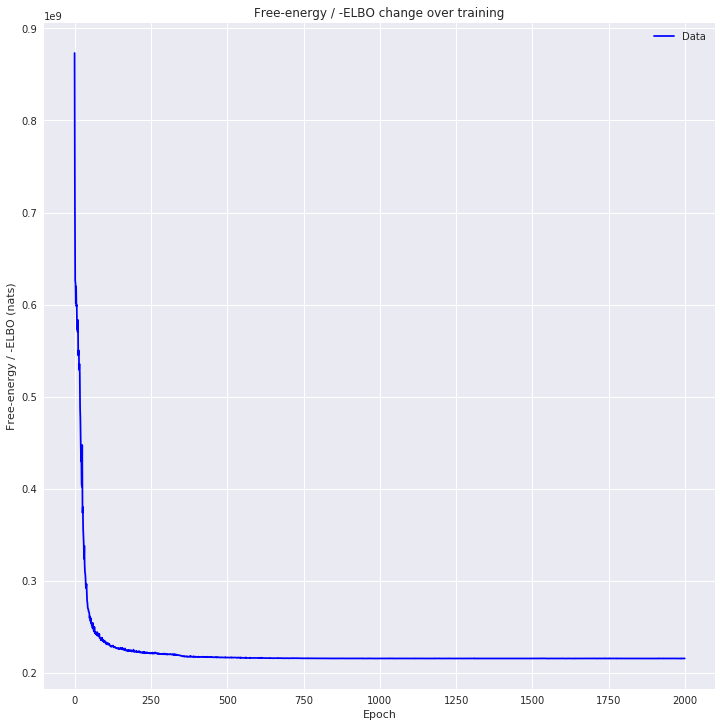

In [9]:
utils.plot_losses(losses)

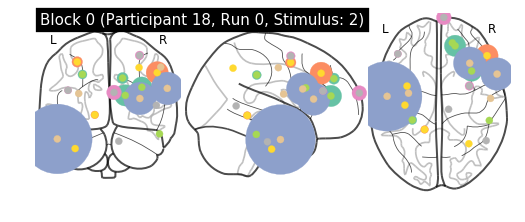

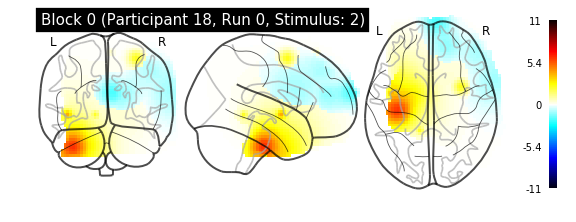

10/02/2018 16:55:45 Reconstruction Error (Frobenius Norm): 6.87177856e+02 out of 3.75924316e+03


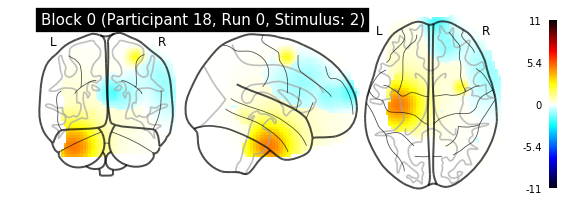

{'weights': tensor([[-1.5199e+00,  5.7780e-02,  3.2092e-01,  ...,  2.7078e+00,
         -1.8689e+00, -6.5221e-02],
        [-1.6696e+00, -4.9773e-01, -3.2604e-02,  ..., -2.5629e+00,
          4.0957e-01, -4.4479e-01],
        [ 2.1759e+00, -2.2592e-01,  5.3637e-02,  ...,  2.2022e-01,
         -1.5407e+00, -4.2459e-01],
        ...,
        [ 9.9051e-01, -4.5637e-01, -1.6198e-01,  ...,  6.0063e-01,
         -5.3352e-01, -2.7641e-01],
        [ 2.2178e+00,  6.0955e-01, -6.6481e-01,  ..., -9.5798e-01,
         -8.9656e-01,  1.1718e-01],
        [ 1.7253e+00, -1.5540e-01, -2.9253e-01,  ..., -5.2625e-01,
         -1.6866e+00, -1.1898e-01]]), 'factors': tensor([[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        ...,
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000, 

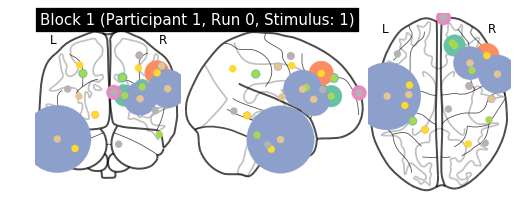

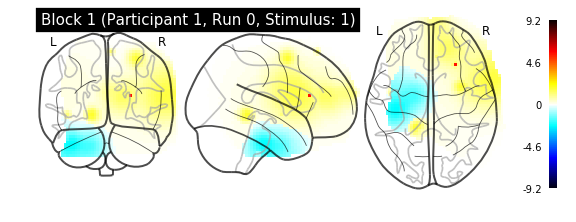

10/02/2018 16:56:19 Reconstruction Error (Frobenius Norm): 7.61778198e+02 out of 4.31739990e+03


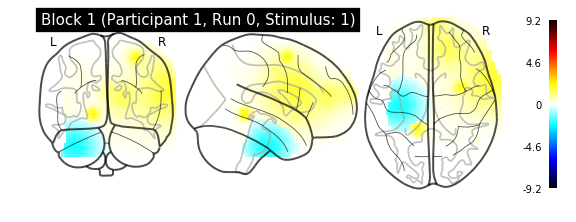

{'weights': tensor([[ 1.2291e+00,  2.5209e-01, -4.5004e-01,  ...,  1.3396e+00,
          1.0619e+00,  2.4922e-01],
        [ 9.6130e-01, -6.1362e-01, -1.2668e+00,  ..., -7.9676e-01,
          4.2596e-01, -3.1407e-01],
        [ 3.6415e+00,  6.4600e-02, -9.7625e-02,  ...,  1.7909e+00,
          2.4474e+00,  6.1403e-01],
        ...,
        [ 2.0244e+00,  9.3885e-01, -8.3558e-01,  ...,  2.8204e+00,
          4.0871e+00,  4.1887e-01],
        [ 2.2546e+00, -2.8843e-01, -1.4511e-01,  ...,  2.0378e+00,
          3.3930e-01, -3.6717e-02],
        [ 2.6371e-02, -2.4646e-01, -1.0697e-01,  ...,  1.5952e+00,
          1.7036e+00, -6.5946e-02]]), 'factors': tensor([[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        ...,
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000, 

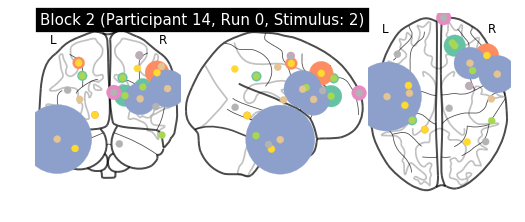

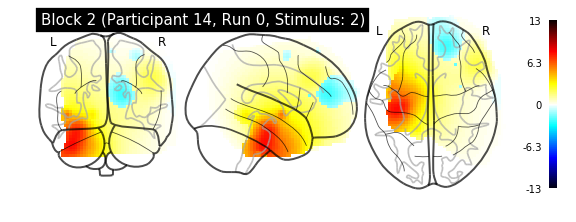

10/02/2018 16:56:52 Reconstruction Error (Frobenius Norm): 1.02054938e+03 out of 4.38294580e+03


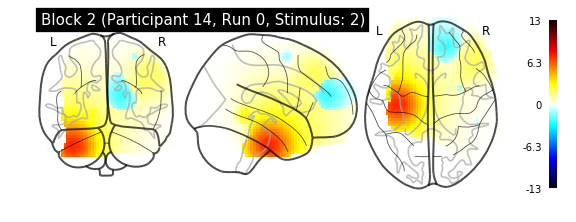

{'weights': tensor([[-3.1185, -0.5623,  0.4228,  ..., -1.5344, -0.5476, -0.3619],
        [ 0.5115,  0.0452,  0.4112,  ...,  2.1355, -0.3298,  0.0032],
        [ 2.5717, -0.4834, -0.0462,  ...,  0.2131, -0.1282, -0.3404],
        ...,
        [-0.7272, -0.7871, -0.0039,  ...,  2.2458, -1.1327, -0.2279],
        [ 0.1747, -0.1720, -0.0183,  ..., -0.5350,  2.7843, -0.7269],
        [-0.2080,  0.0773,  0.2463,  ...,  0.5749,  2.1829, -0.0925]]), 'factors': tensor([[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        ...,
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000]]), 'factor_centers': tensor([[ 17.3325,  45.3416,  14.8437],
        [-27.5109, -33.8518,  34.7307],
        [

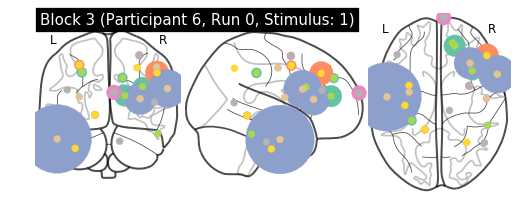

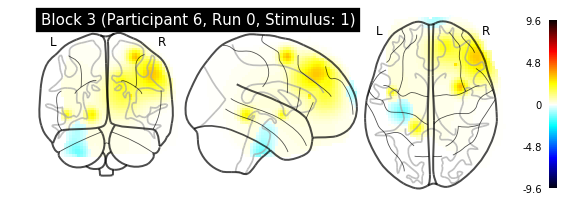

10/02/2018 16:57:26 Reconstruction Error (Frobenius Norm): 1.15690649e+03 out of 4.18535254e+03


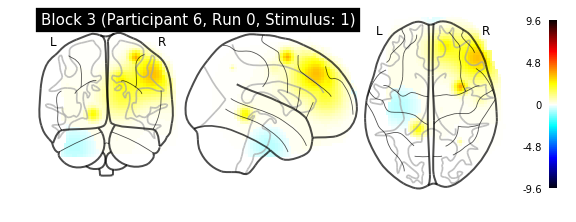

{'weights': tensor([[ 1.7431, -0.0516, -0.0380,  ...,  3.1360, -0.8002,  0.1316],
        [-0.1624, -0.6681,  0.0731,  ...,  1.6768, -0.1808, -0.1102],
        [ 1.1737,  0.1106,  0.2550,  ...,  1.3453,  4.7169, -0.1739],
        ...,
        [ 1.3326, -0.1580,  0.0659,  ...,  1.9417,  1.4544,  0.2018],
        [-1.0920, -0.0905, -0.7198,  ...,  2.9044,  3.2605, -0.3247],
        [-1.3374, -0.6061,  0.3210,  ...,  0.7156,  1.4096, -0.2075]]), 'factors': tensor([[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        ...,
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000]]), 'factor_centers': tensor([[ 17.3565,  45.1527,  14.7768],
        [-28.6146, -34.0667,  37.0092],
        [

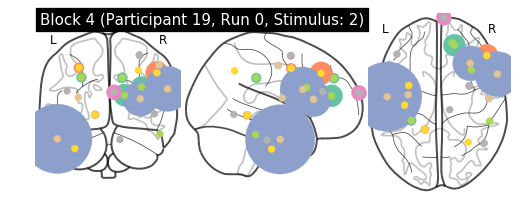

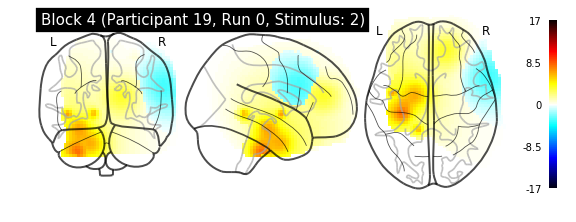

10/02/2018 16:58:00 Reconstruction Error (Frobenius Norm): 1.43758093e+03 out of 7.06944043e+03


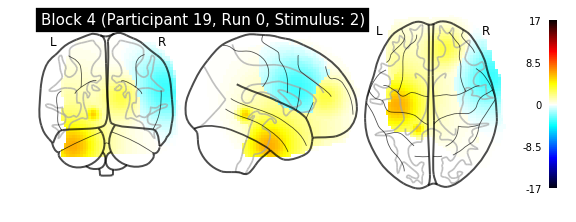

{'weights': tensor([[ 2.7852e+00,  1.7567e-01,  3.1372e-02,  ...,  3.9401e-01,
         -3.6399e-01,  2.5394e-01],
        [ 1.2434e+00,  1.5792e-01, -1.0322e-01,  ...,  1.6653e+00,
         -2.9973e-01,  1.6157e-01],
        [ 3.4478e-01,  4.2053e-01,  1.6736e-01,  ..., -6.6161e-01,
          5.4205e-01,  4.9621e-01],
        ...,
        [ 1.7387e-01,  1.4012e-02, -1.6382e-04,  ...,  1.1516e-01,
         -5.4982e-01,  1.2438e-01],
        [ 1.2189e+00, -9.3182e-02, -5.6949e-01,  ..., -2.0286e-01,
          2.4683e+00,  3.5494e-01],
        [ 3.4639e-01, -1.6056e-02,  2.6516e-01,  ...,  1.4236e-01,
         -2.5480e+00,  5.4278e-01]]), 'factors': tensor([[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        ...,
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000, 

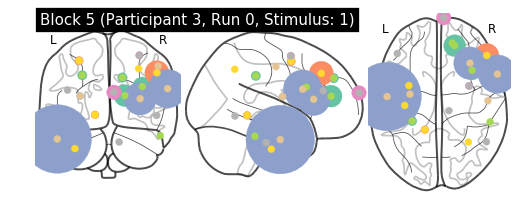

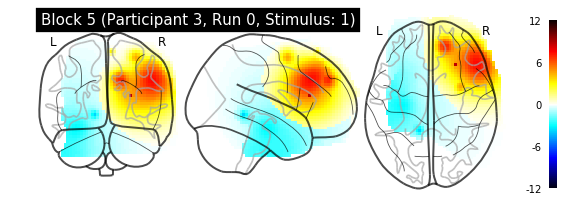

10/02/2018 16:58:35 Reconstruction Error (Frobenius Norm): 1.41605774e+03 out of 5.07146045e+03


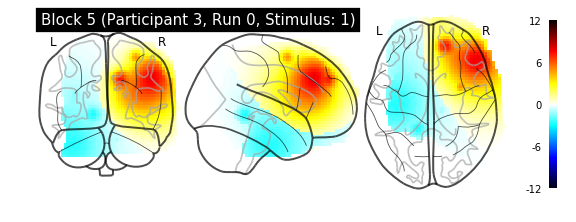

{'weights': tensor([[ 1.7725, -0.5812,  0.0597,  ...,  3.6841,  1.3023, -0.2160],
        [ 2.9176, -0.7820,  0.2350,  ...,  2.2342,  2.4241,  0.2754],
        [ 0.8950, -0.2200, -0.2205,  ...,  2.8864,  0.6468, -0.0447],
        ...,
        [ 3.5504,  0.0366,  0.2890,  ...,  3.2716,  5.7306,  0.1878],
        [ 0.4714, -0.4839, -0.1048,  ...,  0.1593,  1.8134,  0.1236],
        [ 0.3312, -0.1853, -0.3039,  ...,  1.6364,  3.0201,  0.1097]]), 'factors': tensor([[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        ...,
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000]]), 'factor_centers': tensor([[ 17.3453,  45.1833,  14.8222],
        [-27.1653, -33.3217,  34.8009],
        [

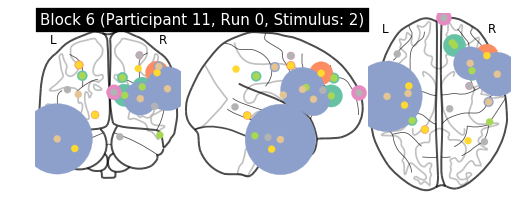

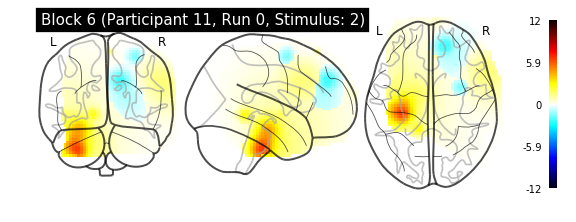

10/02/2018 16:59:09 Reconstruction Error (Frobenius Norm): 1.19230908e+03 out of 3.99532397e+03


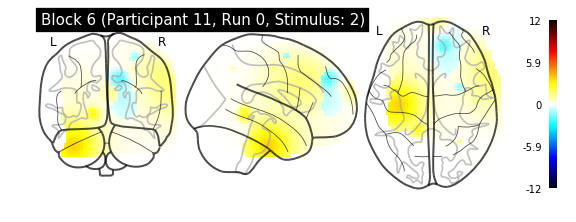

{'weights': tensor([[-4.7388e-01,  3.0586e-01, -8.9028e-02,  ..., -1.7571e+00,
          1.2065e+00,  1.6994e-01],
        [ 1.4485e+00,  1.9688e-01, -2.3117e-02,  ..., -1.5025e+00,
         -7.5614e-01,  5.1076e-01],
        [-1.2000e+00, -2.5728e-01, -5.8850e-01,  ...,  6.0224e-01,
          4.0285e-01,  1.6172e-03],
        ...,
        [ 2.6074e-01, -3.4273e-01, -2.1549e-01,  ..., -3.7616e-02,
          5.5250e-01, -2.0091e-01],
        [ 1.0210e+00,  1.0153e-01,  3.5018e-01,  ..., -3.3456e+00,
         -1.1164e+00,  1.9280e-01],
        [-7.0037e-01, -4.2351e-01,  3.8028e-01,  ...,  4.8579e-01,
         -1.4444e+00,  8.0706e-02]]), 'factors': tensor([[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        ...,
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000, 

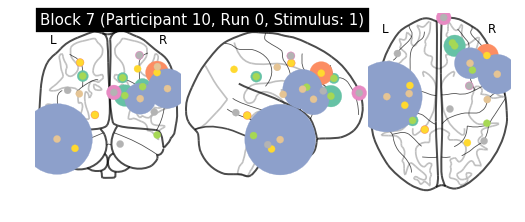

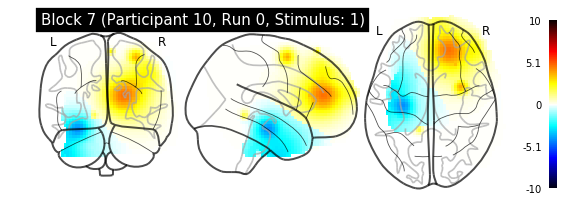

10/02/2018 16:59:43 Reconstruction Error (Frobenius Norm): 8.42366333e+02 out of 4.63891064e+03


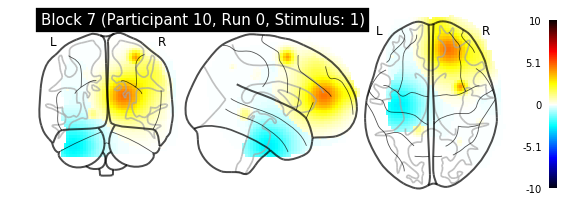

{'weights': tensor([[ 3.5951,  0.4122, -0.4729,  ...,  3.4184,  1.5240,  0.0388],
        [ 1.7909,  0.0739,  0.2814,  ..., -0.4870,  1.3290,  0.5184],
        [ 1.5065, -0.4043, -0.0528,  ...,  0.3237,  1.7190,  0.0744],
        ...,
        [ 4.8724,  0.5149,  0.1471,  ...,  0.5119,  2.0816,  0.1892],
        [ 1.3847, -0.6871, -0.1199,  ...,  1.2821,  2.2857, -0.0882],
        [ 0.1237, -0.0102, -0.2725,  ...,  1.4968,  0.4876,  0.1907]]), 'factors': tensor([[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        ...,
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000]]), 'factor_centers': tensor([[ 17.3492,  44.9909,  14.8945],
        [-27.1884, -32.8550,  37.0951],
        [

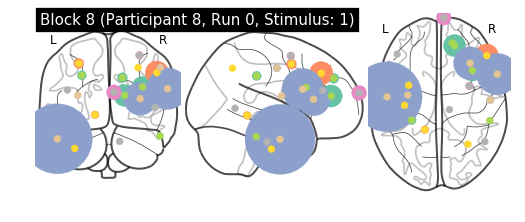

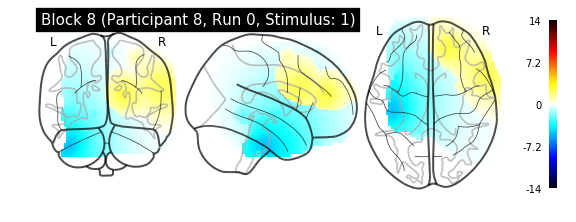

10/02/2018 17:00:18 Reconstruction Error (Frobenius Norm): 1.26420532e+03 out of 4.75800732e+03


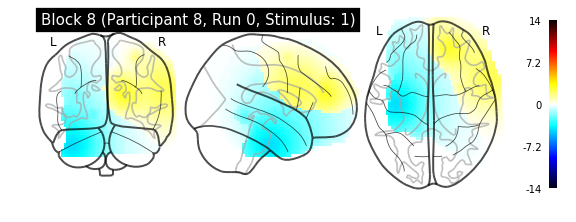

{'weights': tensor([[ 2.7818e+00, -6.9575e-01, -2.4453e-01,  ...,  1.1693e+00,
          7.4187e-01, -3.4674e-01],
        [ 1.7406e+00, -1.8490e-02, -1.7698e-01,  ...,  2.0959e+00,
          9.1116e-01,  3.4281e-02],
        [ 1.0590e+00,  5.5335e-02,  2.9276e-01,  ...,  1.8402e+00,
          2.0375e+00,  1.0783e-01],
        ...,
        [ 3.3476e+00, -3.9279e-01,  3.6653e-01,  ...,  2.6664e+00,
          1.6380e+00,  1.2008e-02],
        [ 1.9466e+00, -1.0416e-01, -3.5443e-02,  ...,  2.3327e+00,
          4.1371e-01,  3.0437e-01],
        [ 1.9955e+00,  4.6804e-02,  1.7921e-01,  ...,  1.6647e+00,
          2.0089e+00,  4.1135e-01]]), 'factors': tensor([[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        ...,
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000, 

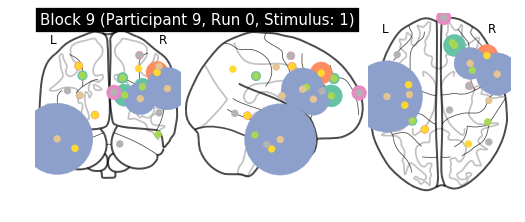

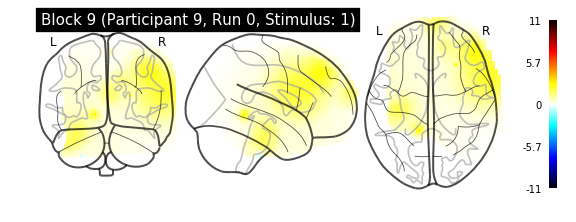

10/02/2018 17:00:52 Reconstruction Error (Frobenius Norm): 7.56938904e+02 out of 4.65325244e+03


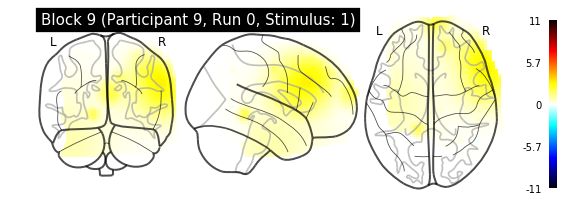

{'weights': tensor([[ 0.4532,  0.0361, -0.6626,  ...,  0.4753,  1.9406, -0.0606],
        [ 1.0774, -0.7219, -0.0282,  ...,  1.3826,  1.8955, -0.2567],
        [ 0.6738, -0.4166, -0.4341,  ...,  1.8181,  3.6556, -0.0724],
        ...,
        [ 2.9549, -0.5431,  0.0401,  ..., -1.0665,  2.5416,  0.0548],
        [-0.2893, -0.9431, -0.0202,  ...,  1.1885, -0.2504,  0.0556],
        [-0.5449, -0.0667,  0.5101,  ..., -0.4565, -0.2734, -0.4875]]), 'factors': tensor([[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        ...,
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000]]), 'factor_centers': tensor([[ 17.4106,  45.3511,  14.7153],
        [-27.4828, -34.6736,  36.3211],
        [

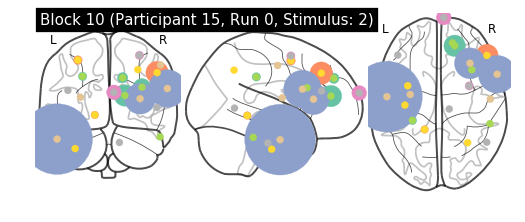

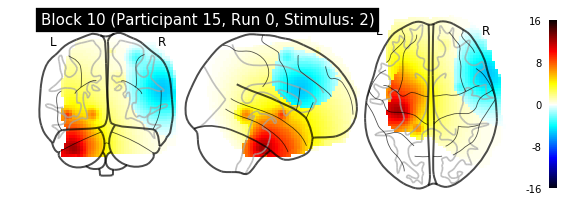

10/02/2018 17:01:26 Reconstruction Error (Frobenius Norm): 1.24141870e+03 out of 5.92730762e+03


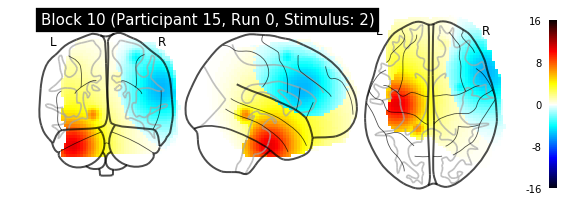

{'weights': tensor([[ 9.9449e-01,  4.9169e-01,  6.2068e-01,  ..., -2.5901e+00,
          3.6947e-01,  1.8920e-01],
        [-1.5041e+00, -2.7726e-01,  4.8766e-01,  ...,  4.7809e-01,
          9.0249e-02,  2.6456e-01],
        [ 6.0800e-01,  4.1717e-01,  7.4498e-01,  ...,  1.1959e+00,
          4.4636e-01,  5.2055e-01],
        ...,
        [ 2.8045e+00,  8.3315e-01, -5.7918e-01,  ...,  1.7572e+00,
         -1.1166e+00,  4.0749e-01],
        [ 1.9349e-01,  3.8932e-01, -1.8230e-01,  ..., -5.7458e-01,
          3.2350e-01,  3.6371e-01],
        [-5.0813e-01,  2.9846e-01, -2.4480e-01,  ..., -3.5060e-01,
          1.2636e+00, -1.8035e-01]]), 'factors': tensor([[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        ...,
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000, 

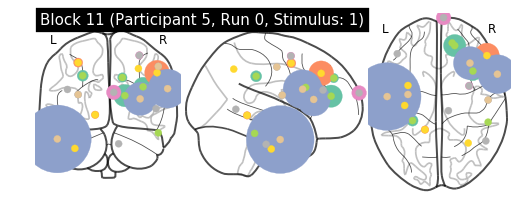

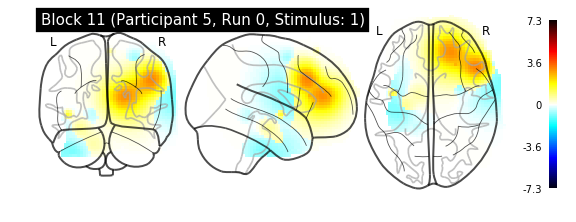

10/02/2018 17:02:00 Reconstruction Error (Frobenius Norm): 6.78487183e+02 out of 2.96820947e+03


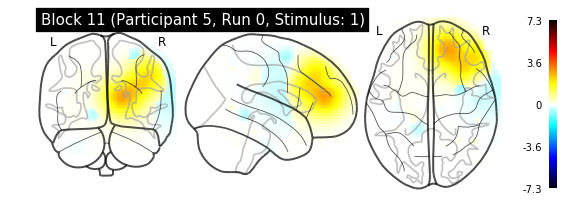

{'weights': tensor([[ 2.5598e+00, -4.0216e-01,  1.0885e+00,  ..., -8.4484e-01,
          2.0403e-01,  3.7928e-01],
        [-3.1493e-01, -5.2908e-01, -3.8062e-01,  ...,  2.6992e-01,
          4.3304e+00, -2.8052e-01],
        [-7.8759e-01, -6.9000e-01, -2.0209e-01,  ...,  3.1168e+00,
         -1.3136e+00, -3.6967e-01],
        ...,
        [-2.1728e-01, -4.7921e-01, -1.2283e-01,  ...,  1.4675e+00,
         -3.5771e-02, -1.2829e-01],
        [ 2.9473e+00, -2.4435e-01,  1.7601e-02,  ...,  1.2156e+00,
         -7.3527e-01, -3.9097e-01],
        [ 1.7653e-01, -2.4260e-01,  5.7118e-02,  ...,  3.0078e+00,
          3.2359e+00, -2.3464e-01]]), 'factors': tensor([[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        ...,
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000, 

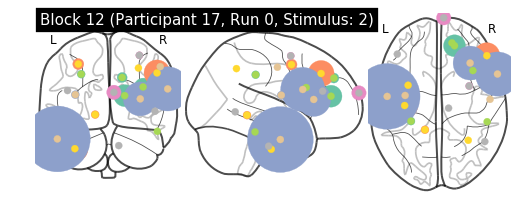

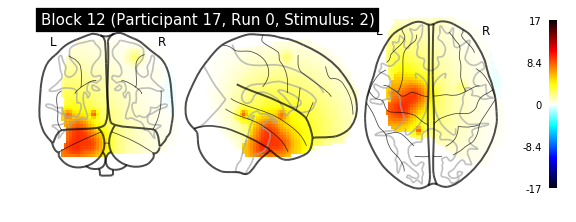

10/02/2018 17:02:34 Reconstruction Error (Frobenius Norm): 1.23396741e+03 out of 5.67011426e+03


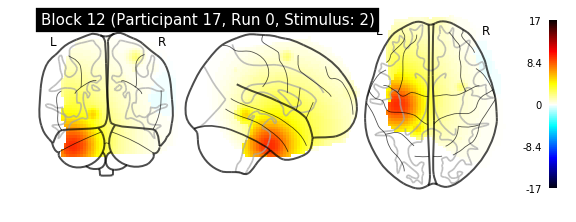

{'weights': tensor([[ 5.8542e-01,  2.5076e-01,  2.4869e-01,  ...,  2.0765e+00,
          9.8983e-01,  2.0101e-01],
        [ 1.1196e-01,  4.8010e-01,  1.4802e-01,  ...,  1.6818e+00,
          2.0261e-01,  2.8691e-01],
        [ 2.8256e+00, -4.6616e-01,  1.6017e-01,  ..., -1.6723e-01,
          1.1568e+00, -5.2182e-01],
        ...,
        [ 3.3621e+00, -1.9156e-01, -4.9610e-01,  ...,  8.0319e-01,
          2.8907e+00,  3.6051e-01],
        [-1.5462e+00,  1.9464e-01,  3.3427e-01,  ..., -3.0946e-01,
          1.6201e+00,  1.4275e-01],
        [ 8.1936e-01, -2.6967e-02,  7.1709e-02,  ..., -9.2445e-01,
         -2.2498e-01,  4.4562e-01]]), 'factors': tensor([[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        ...,
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000, 

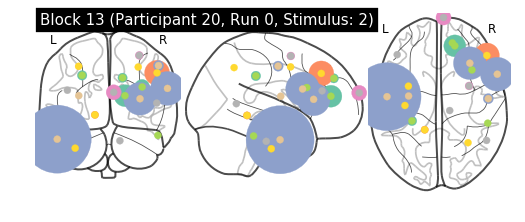

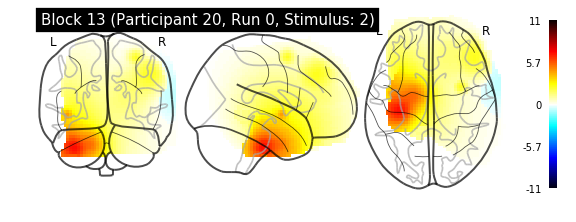

10/02/2018 17:03:08 Reconstruction Error (Frobenius Norm): 8.12384277e+02 out of 3.48627271e+03


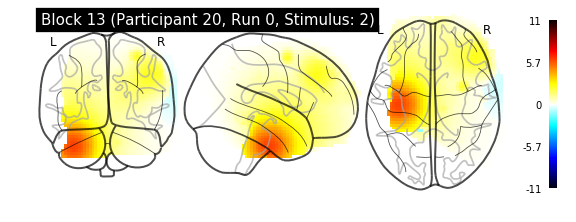

{'weights': tensor([[ 7.0648e-01, -9.6737e-02,  3.2842e-01,  ...,  2.0427e+00,
          5.9713e-01, -1.0320e-01],
        [-3.6113e-01,  3.6365e-01, -2.3406e-01,  ...,  4.9343e-01,
          8.2850e-01,  2.4570e-02],
        [-1.6317e+00,  1.3681e-01, -5.8434e-01,  ...,  3.8608e-01,
          3.3644e-01, -3.9858e-01],
        ...,
        [-6.0718e-01,  1.1993e-01, -1.0074e-01,  ..., -2.6872e-01,
          1.0623e-01,  8.8533e-02],
        [-4.8691e-01, -4.0379e-01,  1.8890e-01,  ...,  4.5301e-01,
         -4.5571e-01, -5.0272e-01],
        [ 2.8652e-01, -2.0117e-01,  3.3896e-01,  ...,  1.1407e-01,
          2.0207e+00, -1.6328e-01]]), 'factors': tensor([[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        ...,
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000, 

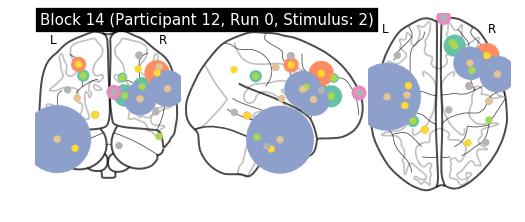

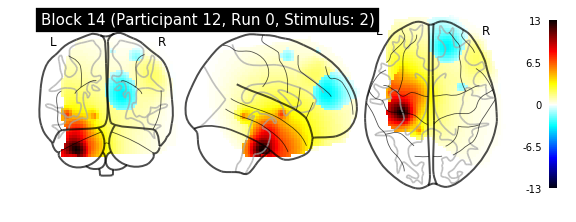

10/02/2018 17:03:42 Reconstruction Error (Frobenius Norm): 1.09849268e+03 out of 4.84448682e+03


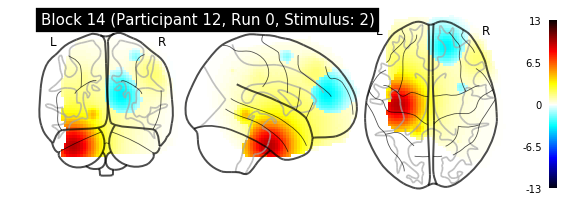

{'weights': tensor([[-4.2625,  0.3063,  0.3064,  ..., -1.6862, -0.3420,  0.0769],
        [ 3.0576, -0.2494, -0.1683,  ...,  1.2046,  1.0414, -0.2723],
        [-0.2063,  0.1709,  0.2696,  ..., -0.0437,  0.8168,  0.2345],
        ...,
        [-1.3927, -0.2926,  0.6315,  ..., -0.1838, -0.2756, -0.4104],
        [ 1.7316, -0.0053, -0.4265,  ...,  0.0262,  1.2754, -0.1651],
        [ 1.0283, -0.4268,  0.0214,  ..., -0.9442, -0.9135,  0.3008]]), 'factors': tensor([[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        ...,
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000]]), 'factor_centers': tensor([[ 17.4225,  45.2327,  14.7171],
        [-27.7422, -34.1091,  36.1610],
        [

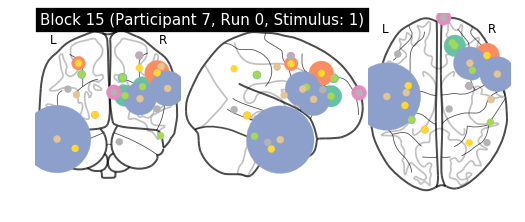

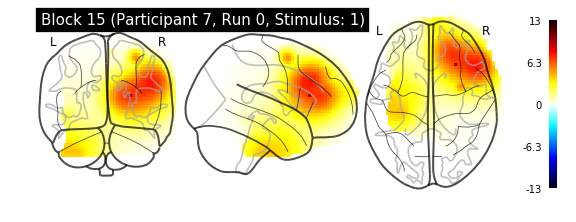

10/02/2018 17:04:16 Reconstruction Error (Frobenius Norm): 1.79105261e+03 out of 6.25709912e+03


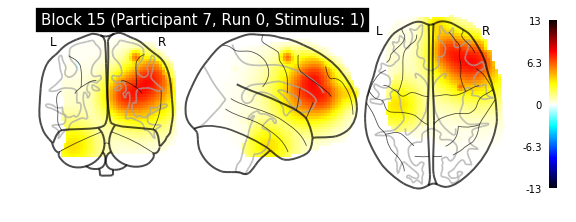

{'weights': tensor([[ 3.8475e+00, -2.1708e-01,  3.6941e-01,  ...,  4.4965e+00,
          2.7688e+00, -3.6510e-01],
        [ 2.4626e+00, -1.5624e-01,  5.6087e-01,  ...,  2.2582e+00,
          6.3171e+00, -1.7334e-01],
        [ 1.6519e+00,  2.8998e-02, -7.9827e-01,  ...,  4.2103e+00,
          3.6404e+00, -3.0742e-01],
        ...,
        [ 4.0068e+00,  1.4034e-01,  1.9014e-01,  ...,  3.0245e+00,
          1.4745e+00,  3.4846e-01],
        [ 1.6239e+00,  8.7767e-02,  6.8924e-03,  ...,  5.4360e+00,
          2.4793e+00,  2.6393e-01],
        [ 4.3608e-01, -1.3351e-01,  4.2964e-01,  ...,  4.2070e+00,
          2.7404e+00,  5.5236e-02]]), 'factors': tensor([[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        ...,
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000, 

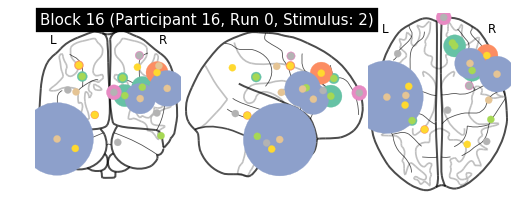

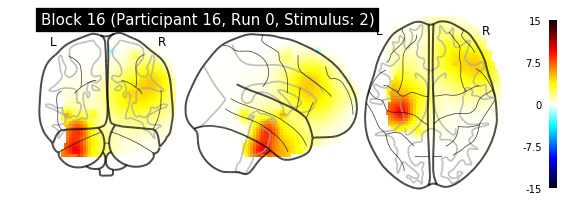

10/02/2018 17:04:50 Reconstruction Error (Frobenius Norm): 1.34980017e+03 out of 6.05331836e+03


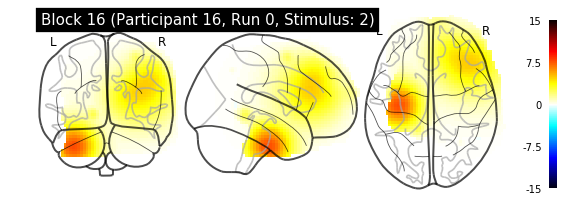

{'weights': tensor([[ 1.5963e+00, -4.6069e-01,  2.9726e-01,  ...,  1.2175e+00,
          1.1691e+00, -1.8416e-01],
        [-7.4608e-01, -9.5178e-01,  5.8955e-01,  ...,  1.9783e+00,
          7.9432e-01,  8.3317e-02],
        [ 1.2759e+00, -5.2182e-01, -2.9666e-01,  ...,  1.0461e+00,
          2.6169e+00,  2.7688e-01],
        ...,
        [-8.1125e-01, -1.6292e-01,  3.4358e-01,  ...,  2.1872e+00,
          1.7218e+00, -3.8567e-01],
        [-2.9962e-01, -4.8581e-01,  1.2331e-01,  ...,  1.2483e+00,
         -3.1580e-01,  9.5069e-02],
        [-4.2774e-01,  8.6350e-02, -4.9545e-01,  ..., -1.2957e+00,
          9.0096e-01,  4.1072e-01]]), 'factors': tensor([[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        ...,
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000, 

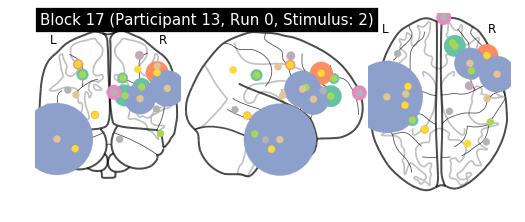

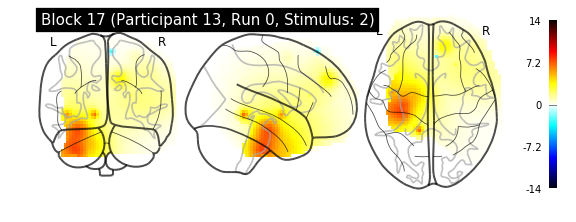

10/02/2018 17:05:24 Reconstruction Error (Frobenius Norm): 1.06326562e+03 out of 5.30861279e+03


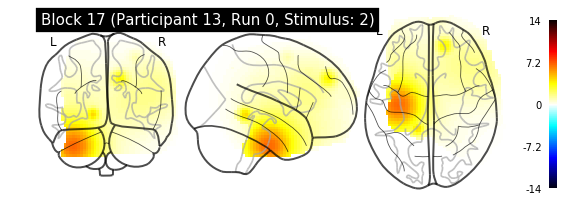

{'weights': tensor([[ 7.6104e-02,  7.3934e-02, -3.6575e-01,  ...,  4.0604e-01,
          4.1469e-01, -9.4332e-02],
        [-7.0482e-01,  3.3623e-01,  2.6042e-01,  ..., -1.3973e-01,
         -8.0652e-01, -3.6241e-01],
        [-8.7695e-01,  2.1153e-01, -5.1434e-01,  ...,  2.2804e-01,
          7.6284e-01, -4.3819e-03],
        ...,
        [-2.4629e-01, -7.5939e-02, -2.4635e-01,  ...,  5.5569e-01,
          1.3132e-02,  4.4359e-01],
        [ 1.5231e+00,  3.6047e-03,  5.7575e-01,  ...,  3.0281e-01,
          1.0850e+00, -2.4938e-01],
        [ 1.1629e-01,  4.6055e-02, -2.4397e-01,  ...,  1.0670e+00,
          3.7666e+00, -4.1041e-01]]), 'factors': tensor([[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        ...,
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000, 

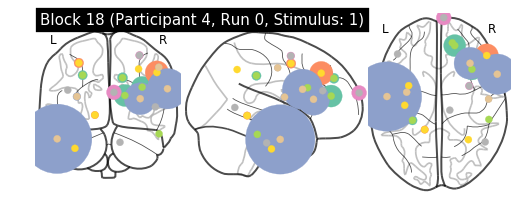

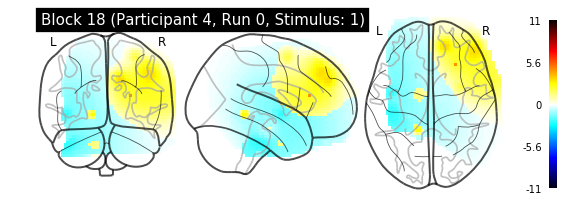

10/02/2018 17:05:57 Reconstruction Error (Frobenius Norm): 9.16113770e+02 out of 3.70546484e+03


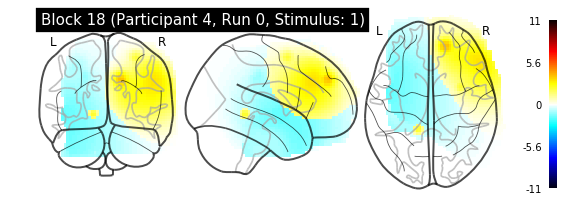

{'weights': tensor([[ 1.0558e+00, -8.9530e-01, -8.5903e-01,  ...,  1.9139e+00,
          5.1266e-01, -3.1520e-01],
        [ 2.4098e+00, -4.7742e-01,  1.3036e-01,  ...,  3.6327e-01,
          1.9251e+00,  7.0980e-02],
        [-1.8718e+00, -1.0486e+00, -1.9122e-01,  ..., -1.5314e+00,
          8.5611e-01, -4.9954e-01],
        ...,
        [ 3.0051e+00,  1.2846e-01, -4.2727e-01,  ...,  1.2374e+00,
          2.9567e+00, -2.6584e-01],
        [ 2.0144e+00, -1.0362e-01,  1.6435e-01,  ..., -5.9349e-01,
         -4.6852e-01, -1.0158e-01],
        [-5.3451e-01,  1.4432e-01, -5.2154e-02,  ...,  4.8883e-01,
          2.0453e+00,  3.4438e-01]]), 'factors': tensor([[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        ...,
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000, 

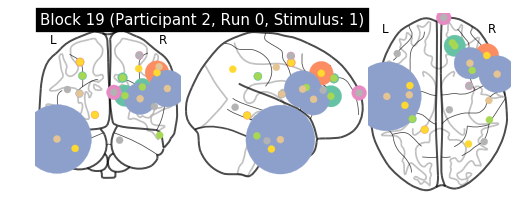

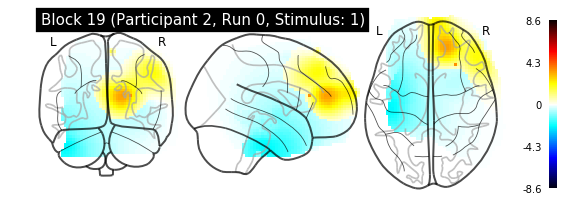

10/02/2018 17:06:31 Reconstruction Error (Frobenius Norm): 8.55646606e+02 out of 3.54014697e+03


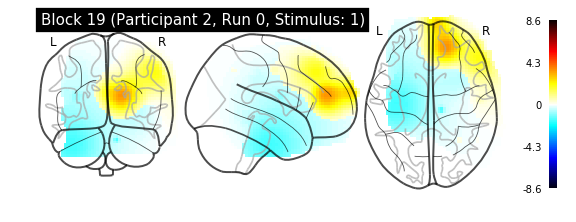

{'weights': tensor([[ 4.1188, -0.2304, -0.2560,  ..., -0.1420,  2.3828, -0.5163],
        [ 1.0107,  0.3150,  0.1682,  ..., -0.4835, -1.5737,  0.7062],
        [ 1.0837,  0.5714, -0.4042,  ...,  0.3315,  1.4184,  0.2099],
        ...,
        [ 0.7749, -0.1974,  0.2566,  ...,  0.6951,  1.2368, -0.0951],
        [ 0.3477, -0.6310, -0.1991,  ...,  0.8753,  1.1377, -0.3235],
        [ 1.4649,  0.3746,  0.1040,  ..., -0.7798,  2.2339, -0.3011]]), 'factors': tensor([[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        ...,
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000]]), 'factor_centers': tensor([[ 17.4475,  45.0496,  14.7163],
        [-27.6801, -32.8168,  36.9611],
        [

In [10]:
for b in range(dtfa.num_blocks):
    dtfa.plot_factor_centers(b)
    dtfa.plot_original_brain(b)
    dtfa.plot_reconstruction(b)
    print(dtfa.results(b))

In [11]:
def task_rest_labeler(block):
    if 'rest' in block.task:
        return 'Rest'
    else:
        return 'Task %s' % block.task

/home/ubuntu/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


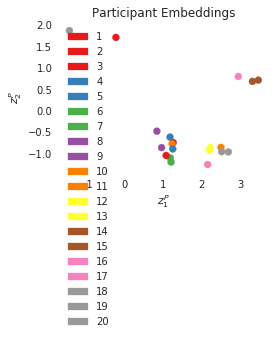

In [12]:
dtfa.scatter_subject_embedding(labeler=lambda block: block.subject)

/home/ubuntu/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


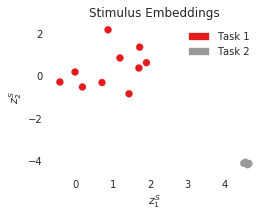

In [13]:
dtfa.scatter_task_embedding(labeler=task_rest_labeler)

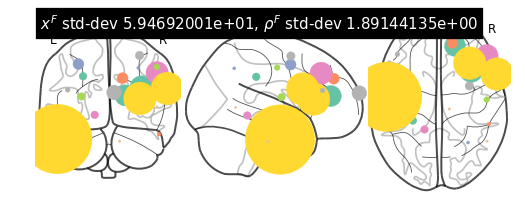

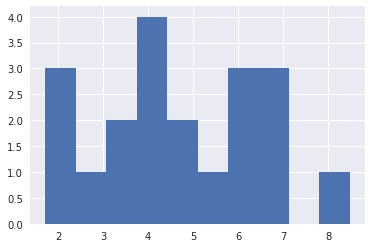

(<nilearn.plotting.displays.OrthoProjector at 0x7fae906a7a58>,
 tensor([[ 17.7775,  44.9422,  14.8792],
         [-26.6057, -33.5831,  35.0291],
         [ 34.8486,  18.7044,  23.4139],
         [ 53.4149, -37.3288, -25.8852],
         [ 14.9851,  48.0570,  33.0678],
         [-35.0855, -17.3703, -41.0230],
         [-31.4418,   2.5960,  47.8848],
         [ 31.5149, -56.7395,  43.9198],
         [-14.3314, -42.9671,  -5.6194],
         [ 51.3857,  34.6490,  38.7317],
         [ 51.0625, -11.5653,  44.8331],
         [-28.1610,  -6.9063,  13.7639],
         [ 62.0409,  15.3169,  22.2115],
         [-53.7097,  -8.5396, -31.0011],
         [ 33.2563,  26.7984,  11.6272],
         [ 11.8551, -21.3761, -33.2531],
         [ 51.4876, -55.2646,   2.8032],
         [ 32.8902,   2.8410,  56.9137],
         [  5.9873,  74.8888,  17.9441],
         [-42.7881,  36.2072,  20.7327]]),
 tensor([ 6.0929,  4.1164,  6.2740,  2.6024,  4.8110,  6.6777,  4.7982,
          2.2709,  4.0949,  6.2179,  3.5294

In [14]:
dtfa.visualize_factor_embedding()

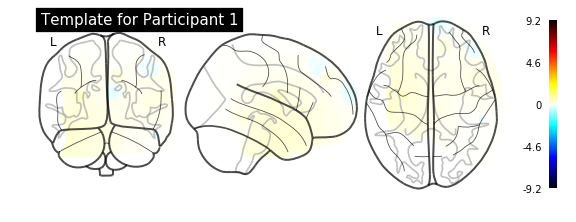

In [15]:
dtfa.plot_subject_template(1)

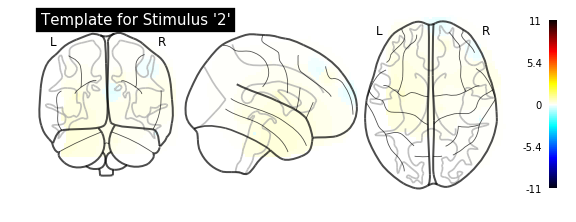

In [16]:
dtfa.plot_task_template('2')